# Assignment 1

Mathia Quimpo, Matthew Chin, Wanqiu Zhang

## Exploration and Preprocessing

In [4]:
import pandas as pd
import numpy as np
import re
import os
import string
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import matplotlib.pyplot as plt

In [5]:
# Download necessary resources
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
# Load dataset
df = pd.read_csv(r"C:\Users\matth\Desktop\MSBA\BSAN 6200\Reviews.csv")

print(df.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [7]:
# Display column names
print("Columns in the dataset:\n", df.columns)

Columns in the dataset:
 Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')


In [8]:
# Get general info
print(df.info())

# Descriptive statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB
None
                  Id  HelpfulnessNumerator  HelpfulnessDenominator  \
count  568454.000000         568454.000000            568454.00000   
mean   284227.500000              1.743817               

In [9]:
# Add a new column for text length
df["Text_Length"] = df["Text"].astype(str).apply(len)

# Display descriptive statistics for text length
print(df["Text_Length"].describe())

count    568454.000000
mean        436.222083
std         445.339741
min          12.000000
25%         179.000000
50%         302.000000
75%         527.000000
max       21409.000000
Name: Text_Length, dtype: float64


In [10]:
# Read a few random review samples
print(df["Text"].sample(10, random_state=45))

300665    I have used this product before and found it t...
167485    The product arrived a bit later than expected ...
313460    I never eat this stuff, usually but Walmart ha...
7589      It's all natural, no artificial color, no weir...
48968     I've not actually used any other filter paper ...
146982    I ordered pack of 4. I've been expected good c...
538997    I try to avoid artificial sweeteners, but I lo...
296558    Timothy's World is your "average, but nothing ...
81877     Imagine doggie treat flavored underarm deodora...
413831    For WW, this is great. Don't get me wrong, I s...
Name: Text, dtype: object


In [11]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

In [12]:
# Text cleaning function
def clean_text(text):
    if not isinstance(text, str):
        return ""  # Handle missing values
    
    # 1. Remove HTML tags using a regex pattern
    text = re.sub(r"<.*?>", "", text)  # Remove HTML tags

    # 2. Replace URLs with a placeholder "URL"
    text = re.sub(r'http[s]?://\S+', 'URL', text)

    # 3. Convert to lowercase
    text = text.lower()

    # 4. Remove special characters, numbers, and punctuation
    text = re.sub(r"[^a-z\s]", "", text)

    # 5. Tokenize the text into words
    words = word_tokenize(text)

    # 6. Remove stopwords and lemmatize
    cleaned_text = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    # 7. Replace multiple spaces with a single space
    cleaned_text = " ".join(cleaned_text)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

    return cleaned_text

In [13]:
# Select 100 random rows
random_sample = df.sample(100)

In [14]:
# Apply the updated cleaning function to the Text column
random_sample["Cleaned_Text"] = random_sample["Text"].apply(clean_text)

In [15]:
# Spot-checking
spotcheck_sample = random_sample[["Text", "Cleaned_Text"]].sample(5)
print(spotcheck_sample)

                                                     Text  \
15624   I must say that my dog and all at the dog park...   
518000  If you read my other reviews of Marshalls Cree...   
120098  Just got a shipment of bulk candy for Christma...   
479991  This is definately chihuahua puppy approved. I...   
212266  This soup has a few shreds of chicken meat in ...   

                                             Cleaned_Text  
15624   must say dog dog park love treat even fussy bo...  
518000  read review marshall creek herb see bad experi...  
120098  got shipment bulk candy christmas red white ho...  
479991  definately chihuahua puppy approved like fact ...  
212266  soup shred chicken meat hardly chunk label pro...  


## VADER

In [17]:
# Initialize VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

In [18]:
# Tokenize the Cleaned_Text once and store it in a new column 'Tokens'
random_sample['Tokens'] = random_sample['Cleaned_Text'].apply(word_tokenize)

In [19]:
# Apply Feature Engineering on the pre-tokenized text
def extract_features_from_tokens(tokens):
    word_count = len(tokens)
    unique_word_count = len(set(tokens))
    avg_word_length = sum(len(word) for word in tokens) / word_count if word_count else 0

    # Sentiment analysis with VADER
    sentiment = analyzer.polarity_scores(" ".join(tokens))  # VADER expects a string, not tokens

    return [word_count, unique_word_count, avg_word_length, sentiment['compound']]

# Now apply the feature extraction on the 'Tokens' column (pre-tokenized)
random_sample[['Word_Count', 'Unique_Word_Count', 'Avg_Word_Length', 'Sentiment_Score']] = random_sample['Tokens'].apply(
    lambda x: pd.Series(extract_features_from_tokens(x)))

# Spot-check the results
print(random_sample[['Text', 'Cleaned_Text', 'Tokens', 'Word_Count', 'Unique_Word_Count', 'Avg_Word_Length', 'Sentiment_Score']].head())


                                                     Text  \
122839  I see that there are presently 30 reviews for ...   
514047  I can't believe there aren't any other reviews...   
456637  We first had this from our neighbourhood speci...   
424675  I thought the bag would be much bigger for the...   
537412  I searched out my favorite KIND bars on Amazon...   

                                             Cleaned_Text  \
122839  see presently review hodgson mill barley bread...   
514047  cant believe arent review yet hand best bake l...   
456637  first neighbourhood specialty grocery wife moc...   
424675  thought bag would much bigger price since get ...   
537412  searched favorite kind bar amazon buying every...   

                                                   Tokens  Word_Count  \
122839  [see, presently, review, hodgson, mill, barley...       110.0   
514047  [cant, believe, arent, review, yet, hand, best...        61.0   
456637  [first, neighbourhood, specialty, groce

In [20]:
def classify_sentiment(sentiment_score):
    if sentiment_score > 0.1:
        return "Positive"
    elif sentiment_score < -0.1:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment classification based on VADER sentiment score
random_sample['Sentiment_Label'] = random_sample['Sentiment_Score'].apply(classify_sentiment)

# Show some of the classified sentiments
print(random_sample[['Cleaned_Text', 'Sentiment_Score', 'Sentiment_Label']].head())

                                             Cleaned_Text  Sentiment_Score  \
122839  see presently review hodgson mill barley bread...           0.9864   
514047  cant believe arent review yet hand best bake l...           0.9154   
456637  first neighbourhood specialty grocery wife moc...           0.7269   
424675  thought bag would much bigger price since get ...           0.2944   
537412  searched favorite kind bar amazon buying every...           0.9877   

       Sentiment_Label  
122839        Positive  
514047        Positive  
456637        Positive  
424675        Positive  
537412        Positive  


In [21]:
# Extract sentiment predictions from VADER
random_sample['VADER_Sentiment'] = random_sample['Sentiment_Score'].apply(
    lambda score: 'Positive' if score > 0 else 'Negative' if score < 0 else 'Neutral'
)

In [22]:
# Spot-check several examples
spotcheck_sample = random_sample[['Text', 'VADER_Sentiment']].sample(5, random_state=45)

print(spotcheck_sample)

                                                     Text VADER_Sentiment
122839  I see that there are presently 30 reviews for ...        Positive
514047  I can't believe there aren't any other reviews...        Positive
234838  My Westie liked this at first, but it didn't r...        Negative
130247  We have used several olive oils, this one is v...        Positive
537883  I have been drinking this tea blend for over a...        Positive


In [23]:
# To manually review the sentiment, you can check the first few examples
for idx, row in spotcheck_sample.iterrows():
    print(f"Review Text: {row['Text']}")
    print(f"VADER Sentiment: {row['VADER_Sentiment']}")
    print("-" * 50)

Review Text: I see that there are presently 30 reviews for this Hodgson Mill Barley Bread Mix, so why, you may ask, do we need another?<br /><br />Glad you asked. I ordered this bread for a few reasons:<br /><br />1) To save a few bucks over store bought<br /><br />2) To always have on hand in pantry<br /><br />3) To enjoy the aroma of fresh baked bread in my home<br /><br />When it was time to bake this bread, I proofed the yeast & it bubbled up.  Just what you want to see. I kneaded the dough for the time stated, & covered it as instructed. When I checked it after 1 1/2 hrs., it had not risen at all, yet I had done all the right things. So I punched it down, fitted it flat onto a quarter size sheet pan, sprinkled it w/rosemary, garlic, black pepper & extra virgin olive oil.<br /><br />It turned out a delicious flatbread, but what went wrong?<br /><br />I called Hodgson Mill, turns out my house temp. of 64 degrees is good for the heat bill but not for bread. The rep was great, told me

## TextBlob

In [25]:
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity, 'Positive' if blob.sentiment.polarity > 0 else ('Negative' if blob.sentiment.polarity < 0 else 'Neutral')

# Apply the function and append new columns
random_sample[['TextBlob_Polarity', 'TextBlob_Subjectivity', 'TextBlob_Sentiment']] = random_sample['Cleaned_Text'].apply(lambda x: pd.Series(analyze_sentiment(x)))

# Display the updated DataFrame
random_sample

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,...,Tokens,Word_Count,Unique_Word_Count,Avg_Word_Length,Sentiment_Score,Sentiment_Label,VADER_Sentiment,TextBlob_Polarity,TextBlob_Subjectivity,TextBlob_Sentiment
122839,122840,B000FDMLV8,AQIGLD8WX496F,Donna,9,9,5,1324425600,Good Bread & More...,I see that there are presently 30 reviews for ...,...,"[see, presently, review, hodgson, mill, barley...",110.0,93.0,5.318182,0.9864,Positive,Positive,0.385289,0.521003,Positive
514047,514048,B000WMU2HM,A1XUORJPX654TO,"Teresa L. Varnhagen ""ttvarnhagen""",11,11,5,1207180800,best low carb brownies ever,I can't believe there aren't any other reviews...,...,"[cant, believe, arent, review, yet, hand, best...",61.0,52.0,5.049180,0.9154,Positive,Positive,0.223611,0.416667,Positive
456637,456638,B000JCR51Q,A1Q8RKN3R8UVQT,"Matthew Asnip ""bibliophile""",4,4,5,1218931200,Good Bacon!,We first had this from our neighbourhood speci...,...,"[first, neighbourhood, specialty, grocery, wif...",20.0,20.0,5.750000,0.7269,Positive,Positive,0.516667,0.244444,Positive
424675,424676,B007HEH712,A2ZGM2SSLRLKLX,"Joel A. Glovier ""JAG""",1,1,2,1350864000,"Delicious, but overpriced.",I thought the bag would be much bigger for the...,...,"[thought, bag, would, much, bigger, price, sin...",20.0,19.0,5.100000,0.2944,Positive,Positive,0.062500,0.725000,Positive
537412,537413,B0034EFIYC,A3K0W4H20MTDRV,MDG,0,0,3,1348963200,A little stale...but I'll give them another ch...,I searched out my favorite KIND bars on Amazon...,...,"[searched, favorite, kind, bar, amazon, buying...",115.0,101.0,5.313043,0.9877,Positive,Positive,0.202628,0.598333,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175169,175170,B0028U7YCW,A2I5MRK2HBO0JC,Angie,6,6,5,1315612800,Delicious & So Healthy!,"In an effort to save during hard times, we dec...",...,"[effort, save, hard, time, decided, turn, once...",89.0,77.0,5.752809,0.9806,Positive,Positive,0.348636,0.618535,Positive
124242,124243,B005ZBZM52,A1IBQ6DTY0Z8IG,Snaby,0,0,5,1340236800,Fantastic K-cup!!,Bought a box of these from BJs before I found ...,...,"[bought, box, bjs, found, amazon, let, tell, o...",129.0,105.0,5.465116,0.9921,Positive,Positive,0.287667,0.569667,Positive
379150,379151,B001TM70XS,A2KOSZTZQMW2PC,JT,0,0,5,1313971200,How do I get cooking like this at home?,"Seriously, this stuff actually looks like some...",...,"[seriously, stuff, actually, look, like, somet...",49.0,45.0,5.204082,0.6822,Positive,Positive,-0.150000,0.408333,Negative
518000,518001,B000N8OJDS,ACMLHXGMNH15J,"Chris Stallings ""stallingsinsurance.com""",9,10,3,1245628800,Marshalls Creek Thyme,If you read my other reviews of Marshalls Cree...,...,"[read, review, marshall, creek, herb, see, bad...",60.0,51.0,5.116667,0.7087,Positive,Positive,0.171591,0.514015,Positive


In [62]:
# Spot-check several examples
pd.set_option('display.max_colwidth', None)
spotcheck_sample = random_sample[['Text','VADER_Sentiment', 'TextBlob_Sentiment']].sample(5)
print(spotcheck_sample)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Text  \
322042  I bought this for

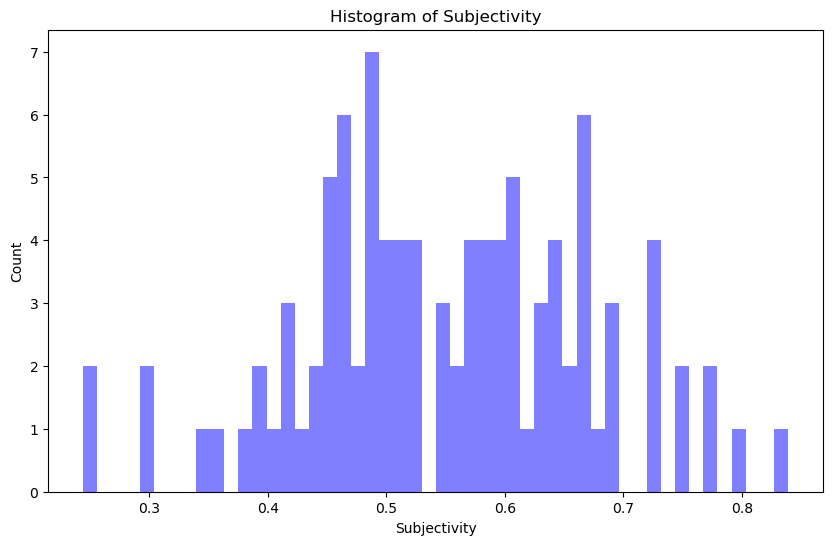

In [27]:
#Draw a histogram that shows the distribution of subjectivity: Count vs. subjectivity
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(random_sample.TextBlob_Subjectivity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Subjectivity')
plt.ylabel('Count')
plt.title('Histogram of Subjectivity')
plt.show()

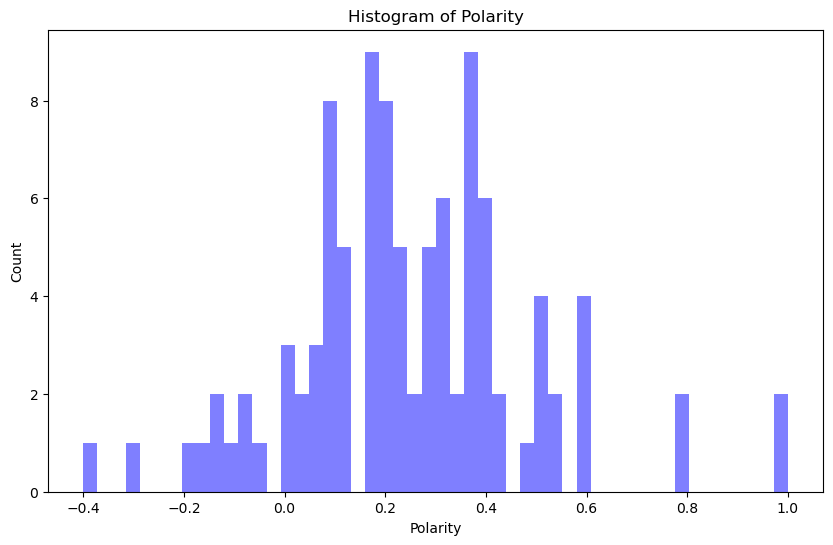

In [28]:
#Draw a histogram that shows the distribution of polarity: Count vs. polarity
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(random_sample.TextBlob_Polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of Polarity')
plt.show()